## Determine Extinction Probabilities

What is the probability that a surname goes extinct?

In [119]:
## number of offspring probabilities from Lange Numerical Analysis p 63
p = [0.4982,0.2103,0.1270,0.0730,0.0418,0.0241,0.0132,0.0069,0.0035,0.0015,0.0005]

In [120]:
import numpy as np
p = np.array(p)

In [121]:
p.size

11

In [122]:
np.sum(p)

0.9999999999999997

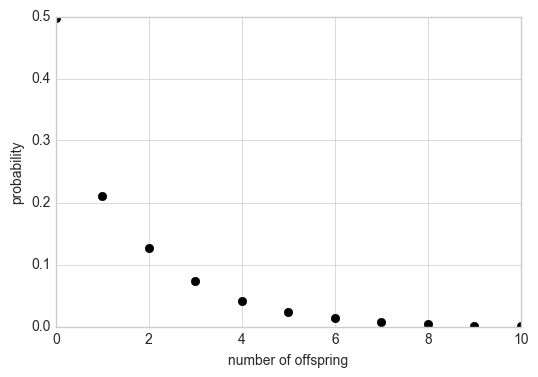

In [123]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
x = np.arange(p.size)
plt.xlabel('number of offspring')
plt.ylabel('probability')
plt.plot(x, p, 'o', color='black');

In [124]:
## create coefficients
coeffs = np.copy(p)
coeffs[1] = coeffs[1] - 1

In [125]:
def extinct(s):
    return np.sum(np.power(s,np.arange(coeffs.size))*coeffs)

In [126]:
x = np.linspace(0,1)
y = np.array([extinct(z) for z in x])

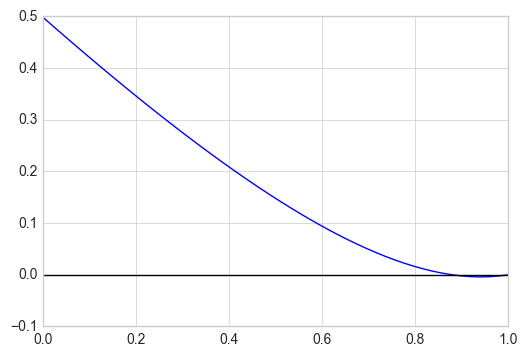

In [127]:
plt.plot(x, y);
plt.plot(x, np.zeros(x.size), 'black')  # solid green

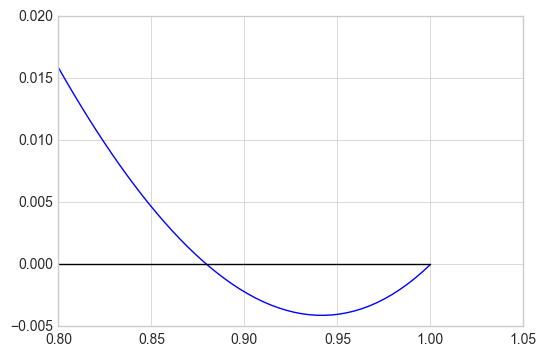

In [128]:
x = np.linspace(0.8,1)
y = np.array([extinct(z) for z in x])
plt.plot(x, y);
plt.plot(x, np.zeros(x.size), 'black')  # solid green

In [129]:
from scipy import optimize

In [130]:
optimize.bisect(extinct,0.0,1.0)

0.8797552304622513

In [131]:
optimize.newton(extinct,0.5)

0.8797552304637153

### What method is fastest?

In [100]:
%timeit optimize.newton(extinct,0.5)

The slowest run took 4.96 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 82.9 µs per loop


In [101]:
%timeit optimize.bisect(extinct,0.0,1.0)

1000 loops, best of 3: 283 µs per loop
